## Lab 2a: Exploring wildfire occurrence data in Python

*********

## Question 1 (20 points): 

Make a **new file** (either a Jupyter Notebook or Spyder `.py` file) and name it `lab2_submission.ipynb`. Write some code to answer the following questions:

* a) Which **county** had the most **human** caused wildfires **>50 acres**? (HINT: use the `FIPS_NAME` column)

 - *Wasco County had the most human caused wildfires, at 244034.65000000002 acres*
 
* b) Which **month** had the most **natural** caused wildfires **>100 acres**?'

 - *August had the most natural caused fires, at 549*
 
* c) How many fires **>200 acres** have an **undetermined** cause (e.g. `Missing data/not specified/undetermined`?

 - *There were 13 fires >200 acres that had an undetermined cause*
 
* d) What is the name, date, and county of the **largest sized fire**?

 - *The largest sized fire was named Long Draw, in Malheur County, at 2012/07/08 00:00:00.000*
 
* e) How many wildfires in **Lane County** were **>50 acres**?

 - *There were 33 wildfires >50 acres*

*Remember, focus on adapting the example code rather than writing your own from scratch.*
**************

**a) Which country had the most human caused wildfires >50 acres**

Wasco County had the most human caused wildfires, at 244034.65000000002 acres

In [38]:
# Import modules
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [39]:
# Define data filepath
pathname = 'lab2/'

# Read data
df = gpd.read_file(pathname + 'or_1992-2018.shp') # 'df' stands for DataFrame

In [40]:
# Filter fires larger than 50 acres
df_50 = df[df['FIRE_SIZE'] > 50]

In [41]:
# Filter fires that were caused by natural causes
df_50_humans = df_50[df_50['NWCG_CAUSE'] == 'Human']

In [42]:
# Group Acres by County
df_counties_grouped = df_50['FIRE_SIZE'].groupby(df_50_human['FIPS_NAME']).sum()

In [43]:
df_counties_grouped

FIPS_NAME
Adams County             80.00
Baker County          83403.40
Benton County           452.00
Clackamas County       6117.00
Clatsop County          457.00
Columbia County          67.00
Coos County            1113.60
Crook County           3025.16
Curry County           1405.30
Deschutes County      19452.00
Douglas County        79469.70
Gilliam County       103391.40
Grant County          18769.90
Harney County        129371.30
Hood River County       974.50
Jackson County         9976.50
Jefferson County      29491.50
Josephine County      15018.00
Klamath County        18007.34
Klickitat County       1250.00
Lake County           87277.00
Lane County           23800.65
Lincoln County          763.00
Linn County            6826.10
Malheur County       132651.90
Marion County          1468.00
Morrow County          3902.70
Multnomah County      49068.00
Polk County             537.00
Sherman County        46714.20
Tillamook County         75.00
Umatilla County       37279.9

In [37]:
print(df_counties_grouped.idxmax(), df_counties_grouped.max())

Wasco County 244034.65000000002


**b) Which Month had the most natural caused wildfires >100 acres**

August had the most natural caused fires, at 549

In [47]:
# Filter fires larger than 100 acres
df_100 = df[df['FIRE_SIZE'] > 100]

In [48]:
# Filter fires that were caused by natural causes
df_100_natural = df_100[df_100['NWCG_CAUSE'] == 'Natural']

In [49]:
datetime = pd.to_datetime(df_100_natural['DISCOVERY_'], format='%Y/%m/%d %H:%M:%S.%f')
datetime

56      2008-07-02
89      2000-07-22
95      2007-08-31
96      2003-06-29
109     2007-07-13
           ...    
67007   2017-08-29
67008   2011-09-15
67014   2014-09-16
67017   2013-08-07
67022   2016-08-17
Name: DISCOVERY_, Length: 1164, dtype: datetime64[ns]

In [50]:
df_100_natural['datetime'] = datetime # Sorry about the warning, extra credit if someone can fix this!

C:\Users\littl\anaconda3\envs\lab2\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [51]:
# Find number of large fires in each year (i.e. number of rows in each year)
df_fire_month = df_100.iloc[:,0].groupby(df_100_natural['datetime'].dt.month).count()

In [52]:
df_fire_month

datetime
4.0       2
5.0       6
6.0      98
7.0     410
8.0     549
9.0      93
10.0      6
Name: OBJECTID, dtype: int64

In [53]:
print(df_fire_month.idxmax(), df_fire_month.max())

8.0 549


**c) How many fires >200 acres have an undetermined cause?**

There were 13 fires >200 acres that had an undetermined cause

In [54]:
# Filter fires larger than 200 acres
df_200 = df[df['FIRE_SIZE'] > 200]

In [55]:
# Filter fires that were caused by natural causes
df_200_unspecified = df_200[df_200['NWCG_CAUSE'] == 'Missing data/not specified/undetermined']

In [56]:
df_200_unspecified

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
190,1909461.0,400031242,FWS-2016FF01RMCN00KP9K,FED,FWS-FMIS,FWS,USWAMNR,McNary National Wildlife Refuge,USWAMNR,MCNARY NWR,...,660.0,E,45.956908,-119.040151,FWS,OR,Umatilla,41059,Umatilla County,POINT (-119.04015 45.95691)
9755,2118753.0,400389824,ICS209_2018_9151636,INTERAGCY,IA-ICS209,ST/C&L,USORSGIN,South Gilliam County Rural Fire Protection Dis...,ORSGIN,South Gilliam County Rural Fire Protection Dis...,...,23600.0,G,45.207830,-120.474000,COUNTY,OR,Gilliam County,41021,Gilliam County,POINT (-120.47400 45.20783)
9871,1359522.0,15001451,ICS209_2000_OR-PRD-844,INTERAGCY,IA-ICS209,BLM,USORPRD,Prineville District,ORPRD,Prineville District,...,500.0,E,44.816667,-120.666667,MISSING/NOT SPECIFIED,OR,None,None,None,POINT (-120.66667 44.81667)
11524,2118725.0,400389795,ICS209_2018_9132954,INTERAGCY,IA-ICS209,BIA,USORWSA,Warm Springs Agency,ORWSA,Warm Springs Agency,...,717.0,E,44.760000,-121.230000,BIA,OR,Jefferson County,41031,Jefferson County,POINT (-121.23000 44.76000)
13028,2118757.0,400389828,ICS209_2018_9219255,INTERAGCY,IA-ICS209,FS,USORWWF,Wallowa-Whitman National Forest,ORWWF,Wallowa-Whitman National Forest,...,800.0,E,44.876180,-117.004000,PRIVATE,OR,Baker County,41001,Baker County,POINT (-117.00400 44.87618)
41888,2043068.0,400233487,ICS209_2017_7389895,INTERAGCY,IA-ICS209,FS,USORRSF,Rogue River-Siskiyou National Forest,ORRSF,Rogue River-Siskiyou National Forest,...,310.0,E,42.980280,-122.281700,MISSING/NOT SPECIFIED,OR,Klamath County,41035,Klamath County,POINT (-122.28170 42.98028)
45288,1359521.0,15001450,ICS209_2000_OR-ORS-919,INTERAGCY,IA-ICS209,ST/C&L,USORORS,Oregon Department of Forestry Salem Headquarters,ORORS,Oregon Department of Forestry State Headquarters,...,800.0,E,44.133333,-120.266667,MISSING/NOT SPECIFIED,OR,None,None,None,POINT (-120.26667 44.13333)
51464,1577997.0,201508245,W-649063,FED,DOI-WFMI,BLM,USORLAD,Lakeview District,ORLAD,Lakeview District,...,241.0,D,43.155800,-120.637500,BLM,OR,Lake,41037,Lake County,POINT (-120.63750 43.15580)
56054,2118767.0,400389838,ICS209_2018_9212487,INTERAGCY,IA-ICS209,ST/C&L,USOR723S,Gold Beach Unit,OR723S,Gold Beach Unit,...,397.0,E,42.590000,-124.250000,STATE,OR,Curry County,41015,Curry County,POINT (-124.25000 42.59000)
60018,1359053.0,15000709,ICS209_2009_OR-711S-110-10,INTERAGCY,IA-ICS209,ST/C&L,USOR711S,Medford Unit,OR711S,Medford Unit,...,633.0,E,42.346944,-122.811944,MISSING/NOT SPECIFIED,OR,Jackson,41029,Jackson County,POINT (-122.81194 42.34694)


In [60]:
index = df_200_unspecified.index

In [61]:
number_of_rows = len(index)

In [62]:
print(number_of_rows)

13


**d) What is the name, date, and county of the largest sized fire?**

The largest sized fire was Long Draw, in Malheur County, at 2012/07/08 00:00:00.000

In [64]:
max_size = df['FIRE_SIZE'].max()

In [67]:
print(df.loc[df['FIRE_SIZE'] == max_size, 'FIRE_NAME'].item())

LONG DRAW


In [69]:
print(df.loc[df['FIRE_SIZE'] == max_size, 'DISCOVERY_'].item())

2012/07/08 00:00:00.000


In [70]:
print(df.loc[df['FIRE_SIZE'] == max_size, 'FIPS_NAME'].item())

Malheur County


**e) How many wildfires in Lane County were >50 acres?**

There were 33 wildfires >50 acres

In [72]:
# Filter fires larger than 50 acres
df_50_acres = df[df['FIRE_SIZE'] > 50]

In [73]:
df_lane = df_50_acres[df_50_acres['FIPS_NAME'] == 'Lane County']

In [74]:
df_lane

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYS,SOURCE_S_1,NWCG_REPOR,NWCG_REP_1,NWCG_REP_2,SOURCE_REP,SOURCE_R_1,...,FIRE_SIZE,FIRE_SIZE_,LATITUDE,LONGITUDE,OWNER_DESC,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
16668,1904575.0,400026134,W-696965,FED,DOI-WFMI,BLM,USORNOD,Northwest Oregon District,OREUD,Eugene District,...,191.00,D,44.234400,-123.426900,BLM,OR,Lane,41039,Lane County,POINT (-123.42690 44.23440)
16673,1726152.0,300005534,FS-1527915,FED,FS-FIRESTAT,FS,USORSUF,Siuslaw National Forest,0612,Siuslaw National Forest,...,80.50,C,44.243333,-123.861667,STATE OR PRIVATE,OR,Lane,41039,Lane County,POINT (-123.86167 44.24333)
17286,806186.0,913289,ODF-79990,NONFED,ST-ORORS,ST/C&L,USOR781S,Western Lane District,ORODF-781,Western Lane District,...,60.25,C,44.130280,-123.529720,PRIVATE,OR,20,41039,Lane County,POINT (-123.52972 44.13028)
17334,806205.0,913310,ODF-79910,NONFED,ST-ORORS,ST/C&L,USOR781S,Western Lane District,ORODF-781,Western Lane District,...,105.00,D,44.170560,-123.530280,PRIVATE,OR,20,41039,Lane County,POINT (-123.53028 44.17056)
17977,1647170.0,201777437,W-658467,FED,DOI-WFMI,BLM,USORNOD,Northwest Oregon District,OREUD,Eugene District,...,119.00,D,44.056720,-123.200690,BLM,OR,Lane,41039,Lane County,POINT (-123.20069 44.05672)
26154,1887596.0,400008667,FS-6826426,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,199.00,D,44.425556,-121.916667,USFS,OR,039,41039,Lane County,POINT (-121.91667 44.42556)
27184,1181356.0,1433549,FS-1491869,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,3454.00,F,44.269444,-121.908611,USFS,OR,039,41039,Lane County,POINT (-121.90861 44.26944)
27772,1887545.0,400008616,FS-6826364,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,18086.00,G,44.100556,-121.909167,USFS,OR,039,41039,Lane County,POINT (-121.90917 44.10056)
27773,1887539.0,400008610,FS-6809532,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,3575.00,F,44.100833,-121.994722,USFS,OR,039,41039,Lane County,POINT (-121.99472 44.10083)
27795,1888765.0,400009850,FS-6826413,FED,FS-FIRESTAT,FS,USORWIF,Willamette National Forest,0618,Willamette National Forest,...,3587.00,F,44.128889,-122.096667,USFS,OR,039,41039,Lane County,POINT (-122.09667 44.12889)


In [75]:
index = df_lane.index

In [76]:
number_of_rows_2 = len(index)

In [77]:
print(number_of_rows_2)

33


## Lab 2b: Where are wildfires occurring in Lane County Oregon?


In [1]:
# Import modules
from cenpy import products
import matplotlib.pyplot as plt

# Define product
acs = products.ACS(2019)

In [2]:
# Print list of tables
acs.filter_tables('POPULATION', by='description')

,description,columns
table_name,,
B01003,TOTAL POPULATION,[B01003_001E]
B05006,PLACE OF BIRTH FOR THE FOREIGN-BORN POPULATION...,"[B05006_001E, B05006_002E, B05006_003E, B05006..."
B05007,PLACE OF BIRTH BY YEAR OF ENTRY BY CITIZENSHIP...,"[B05007_001E, B05007_002E, B05007_003E, B05007..."
B05008,SEX BY PLACE OF BIRTH BY YEAR OF ENTRY FOR THE...,"[B05008_001E, B05008_002E, B05008_003E, B05008..."
B05013,SEX BY AGE FOR THE FOREIGN-BORN POPULATION,"[B05013_001E, B05013_002E, B05013_003E, B05013..."
...,...,...
C24030,SEX BY INDUSTRY FOR THE CIVILIAN EMPLOYED POPU...,"[C24030_001E, C24030_002E, C24030_003E, C24030..."
C24040,"SEX BY INDUSTRY FOR THE FULL-TIME, YEAR-ROUND ...","[C24040_001E, C24040_002E, C24040_003E, C24040..."
C24050,INDUSTRY BY OCCUPATION FOR THE CIVILIAN EMPLO...,"[C24050_001E, C24050_002E, C24050_003E, C24050..."


In [19]:
# Download data
lee_pop = products.ACS(2019).from_county('Lee County, FL', level='tract',
                                        variables=['B01003_001E']) # don't worry about the deprecation message!

C:\Users\littl\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\littl\anaconda3\envs\lab2\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\littl\anaconda3\envs\lab2\lib\site-packages\cenpy\products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` paramete

In [20]:
# Calculate some stats
lee_pop['B01003_001E'].describe()

count      167.000000
mean      4415.976048
std       2783.673702
min          0.000000
25%       2569.500000
50%       3667.000000
75%       5997.000000
max      13152.000000
Name: B01003_001E, dtype: float64

<AxesSubplot:>

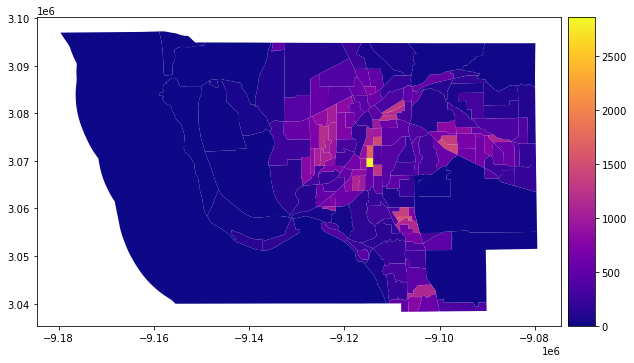

In [21]:
lee_pop['pop_density'] = lee_pop['B01003_001E'] / (lee_pop['geometry'].area / 1e+6)

from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot map
f, ax = plt.subplots(1, 1, figsize=(10,10))

# These two lines make the colorbar the same size as the axes.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

lee_pop.plot('pop_density', ax=ax, cmap='plasma', legend=True, cax=cax)

## Question 2 (20 points): 
* a) Write some more code in `lab2_submission.ipynb` to produce a chloropleth map for a city, county or state showing a Census variable (or derived variable) of your choice. Consider choosing a place or variable that inetrests you. The following is a useful guide: https://nbviewer.org/github/ljwolf/cenpy/blob/master/notebooks/product-api.ipynb?


 -  *I chose Lee County, Florida, because that's where my Aunt lives and it has a really large population, so I thought it would be interesting to see its population density.*

## Task 3 (10 points):
* a) Save your answers notebook, commit and push to GitHub using instructions from Lab 1
* c) Also upload your answers as a <code>.pdf</code> to Canvas

**************